In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import plotly.express as px
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3009/3917047455.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('/Users/hj/Documents/무제/실전프로젝트/스파르타(튜터) - 스포티파이 데이터.csv')
df

,userid,timestamp,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,...,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,24,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,...,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time","recommendations, Playlists, Radio",1,Rarely,Comedy,Interview,Both,Shorter,Very Satisfied
1,25,2023-07-01,20-35,Male,More than 2 years,"Smartphone, Computer or laptop",Premium (paid subscription),Yes,Family Plan-Rs 179/month,Music,...,"Relaxation and stress relief, Sadness or melan...",Study Hours,"recommendations, Radio",3,Rarely,Lifestyle and Health,Conversational,Both,Both,Ok
2,27,2023-07-01,12-20,Male,6 months to 1 year,"Smartphone, Smart speakers or voice assistants",Premium (paid subscription),Yes,Student Plan-Rs 59/month,Podcast,...,Relaxation and stress relief,"Office hours, While Traveling, Workout session",recommendations,4,Several times a week,Lifestyle and Health,Story telling,Both,Longer,Satisfied
3,50,2023-07-01,20-35,Male,1 year to 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,...,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",recommendations,4,Rarely,Comedy,Story telling,unknown Podcasters,Shorter,Very Satisfied
4,60,2023-07-01,20-35,Male,More than 2 years,"Computer or laptop, Wearable devices",Premium (paid subscription),Yes,Family Plan-Rs 179/month,Music,...,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time","recommendations, Playlists",5,Never,NaN,NaN,NaN,NaN,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,514,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Free (ad-supported),No,NaN,Music,...,"Relaxation and stress relief, Uplifting and mo...","Study Hours, While Traveling, leisure time","recommendations, Playlists, Others",4,Never,NaN,NaN,NaN,NaN,Ok
516,515,2023-07-01,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,NaN,Music,...,Relaxation and stress relief,While Traveling,"recommendations, Playlists",4,Rarely,NaN,Conversational,Both,Shorter,Satisfied
517,516,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,...,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
518,517,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,...,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   userid                       520 non-null    int64 
 1   timestamp                    520 non-null    object
 2   Age                          520 non-null    object
 3   Gender                       520 non-null    object
 4   spotify_usage_period         520 non-null    object
 5   spotify_listening_device     520 non-null    object
 6   spotify_subscription_plan    520 non-null    object
 7   premium_sub_willingness      520 non-null    object
 8   preffered_premium_plan       312 non-null    object
 9   preferred_listening_content  520 non-null    object
 10  fav_music_genre              520 non-null    object
 11  music_time_slot              520 non-null    object
 12  music_Influencial_mood       520 non-null    object
 13  music_lis_frequency          520 no

In [4]:
dd = pd.read_csv('/Users/hj/Documents/무제/실전프로젝트/스파르타(튜터) - 매출지표.csv')
dd

,userid,spotify_subscription_plan,revenue,timestamp
0,1,Premium (paid subscription),60000,2023-01-01
1,2,Premium (paid subscription),60000,2023-01-01
2,3,Premium (paid subscription),60000,2023-01-01
3,4,Premium (paid subscription),60000,2023-01-01
4,5,Premium (paid subscription),60000,2023-01-01
...,...,...,...,...
3115,516,Free (ad-supported),0,2023-06-01
3116,517,Free (ad-supported),0,2023-06-01
3117,518,Free (ad-supported),0,2023-06-01
3118,519,Premium (paid subscription),60000,2023-06-01


In [5]:
spotify = pd.merge(dd, df, on = 'userid', how='outer')
spotify

## revenue x, revenue y 만들어보기 
## userid, revenue x,y, timestamp_X, y 빼서 시각화
## 무료-무료, 무료-유료, 유료-무료, 유료-유료 시각화  (패턴 파악, 상황파악.)

,userid,spotify_subscription_plan_x,revenue,timestamp_x,timestamp_y,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan_y,...,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,1,Premium (paid subscription),60000,2023-01-01,2023-07-01,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),...,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,1,Free (ad-supported),0,2023-02-01,2023-07-01,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),...,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
2,1,Free (ad-supported),0,2023-03-01,2023-07-01,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),...,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
3,1,Free (ad-supported),0,2023-04-01,2023-07-01,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),...,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
4,1,Free (ad-supported),0,2023-05-01,2023-07-01,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),...,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,520,Premium (paid subscription),60000,2023-02-01,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Premium (paid subscription),...,"Relaxation and stress relief, Sadness or melan...","Office hours,Study Hours, While Traveling, lei...","Playlists, Radio",3,Never,NaN,NaN,NaN,NaN,Ok
3116,520,Premium (paid subscription),60000,2023-03-01,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Premium (paid subscription),...,"Relaxation and stress relief, Sadness or melan...","Office hours,Study Hours, While Traveling, lei...","Playlists, Radio",3,Never,NaN,NaN,NaN,NaN,Ok
3117,520,Premium (paid subscription),60000,2023-04-01,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Premium (paid subscription),...,"Relaxation and stress relief, Sadness or melan...","Office hours,Study Hours, While Traveling, lei...","Playlists, Radio",3,Never,NaN,NaN,NaN,NaN,Ok
3118,520,Premium (paid subscription),60000,2023-05-01,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Premium (paid subscription),...,"Relaxation and stress relief, Sadness or melan...","Office hours,Study Hours, While Traveling, lei...","Playlists, Radio",3,Never,NaN,NaN,NaN,NaN,Ok


In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   userid                       3120 non-null   int64 
 1   spotify_subscription_plan_x  3120 non-null   object
 2   revenue                      3120 non-null   int64 
 3   timestamp_x                  3120 non-null   object
 4   timestamp_y                  3120 non-null   object
 5   Age                          3120 non-null   object
 6   Gender                       3120 non-null   object
 7   spotify_usage_period         3120 non-null   object
 8   spotify_listening_device     3120 non-null   object
 9   spotify_subscription_plan_y  3120 non-null   object
 10  premium_sub_willingness      3120 non-null   object
 11  preffered_premium_plan       1872 non-null   object
 12  preferred_listening_content  3120 non-null   object
 13  fav_music_genre              3120

In [7]:
spotify[spotify['userid']==3]

,userid,spotify_subscription_plan_x,revenue,timestamp_x,timestamp_y,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan_y,...,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
12,3,Premium (paid subscription),60000,2023-01-01,2023-07-01,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),...,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
13,3,Free (ad-supported),0,2023-02-01,2023-07-01,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),...,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
14,3,Free (ad-supported),0,2023-03-01,2023-07-01,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),...,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
15,3,Premium (paid subscription),60000,2023-04-01,2023-07-01,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),...,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
16,3,Premium (paid subscription),60000,2023-05-01,2023-07-01,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),...,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
17,3,Premium (paid subscription),60000,2023-06-01,2023-07-01,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),...,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied


### 최근 구매일자 구하기 R

In [8]:

spotify['timestamp_x'] = pd.to_datetime(spotify['timestamp_x'])

positive_revenue_df = spotify[spotify['revenue'] > 0]

most_recent_dates = positive_revenue_df.groupby('userid')['timestamp_x'].max()
most_recent_dates

userid
1     2023-01-01
2     2023-05-01
3     2023-06-01
4     2023-06-01
5     2023-06-01
         ...    
514   2023-06-01
515   2023-06-01
516   2023-05-01
519   2023-06-01
520   2023-06-01
Name: timestamp_x, Length: 354, dtype: datetime64[ns]

In [9]:
spotify['timestamp_x'] = pd.to_datetime(spotify['timestamp_x'])

positive_revenue_df = spotify[spotify['revenue'] > 0]

# 'spotify_subscription_plan_y'가 'Premium(유료 구독)'인 경우 'timestamp_y'를 선택할 수 있는 함수를 정의
def choose_timestamp(row):
    if row['spotify_subscription_plan_y'] == 'Premium (paid subscription)':
        return row['timestamp_y']
    else:
        return row['timestamp_x']

# Apply the function to create a new 'most_recent_dates' column
positive_revenue_df['most_recent_dates'] = positive_revenue_df.apply(choose_timestamp, axis=1)

# Group by 'userid' and get the maximum 'most_recent_dates'
most_recent_dates = positive_revenue_df.groupby('userid')['most_recent_dates'].max()
most_recent_dates = pd.to_datetime(most_recent_dates)
most_recent_dates_formatted = most_recent_dates.dt.strftime('%Y-%m-%d')

most_recent_dates


/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3009/2861802641.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_revenue_df['most_recent_dates'] = positive_revenue_df.apply(choose_timestamp, axis=1)


userid
1     2023-01-01
2     2023-05-01
3     2023-06-01
4     2023-06-01
5     2023-06-01
         ...    
514   2023-06-01
515   2023-06-01
516   2023-05-01
519   2023-07-01
520   2023-07-01
Name: most_recent_dates, Length: 354, dtype: datetime64[ns]

In [10]:
most_recent_dates.value_counts()

most_recent_dates
2023-06-01    116
2023-07-01     96
2023-05-01     74
2023-03-01     32
2023-04-01     27
2023-01-01      9
Name: count, dtype: int64

Text(0.5, 1.0, '유저별 Recency date 분포')

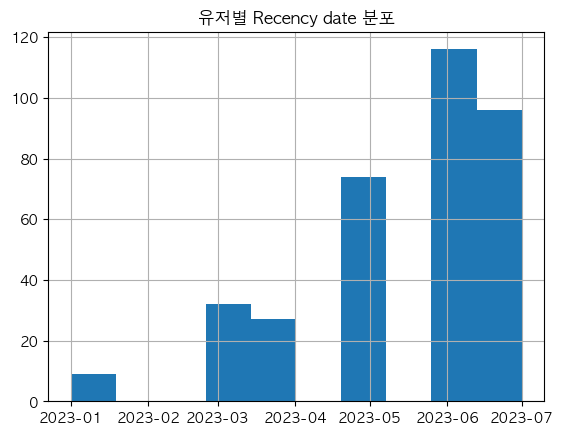

In [11]:
most_recent_dates.hist()
plt.title('유저별 Recency date 분포')

### 유료 결제 카운트 F

In [12]:
sales_count_by_user = spotify[spotify['revenue'] >0].groupby('userid')['revenue'].count()
print(sales_count_by_user)

userid
1      1
2      2
3      4
4      4
5      4
      ..
514    4
515    2
516    1
519    6
520    6
Name: revenue, Length: 354, dtype: int64


In [13]:
filtered_data = spotify[spotify['revenue'] > 0]

# '프리미엄(유료가입)' 사용자의 경우 조건부 증가 + 1
sales_count_by_user = filtered_data.groupby('userid')['revenue'].count()
premium_users = filtered_data[filtered_data['spotify_subscription_plan_y'] == 'Premium (paid subscription)']['userid']
sales_count_by_user.loc[premium_users] += 1

# Display the result
print(sales_count_by_user)

userid
1      1
2      2
3      4
4      4
5      4
      ..
514    4
515    2
516    1
519    7
520    7
Name: revenue, Length: 354, dtype: int64


In [14]:
sales_count_by_user.value_counts()

revenue
1    160
2     81
5     33
4     29
6     26
3     13
7     12
Name: count, dtype: int64

Text(0.5, 1.0, '유저별 구독횟수 count')

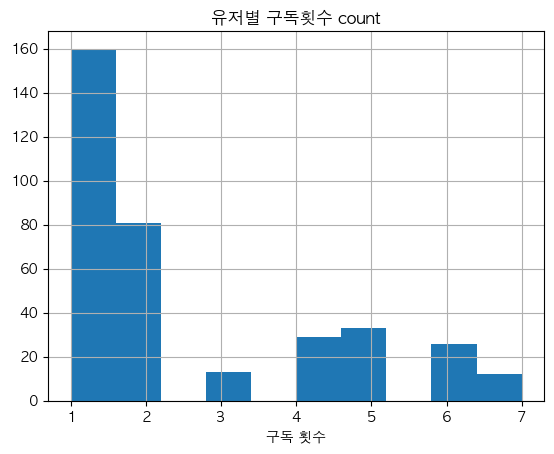

In [15]:
sales_count_by_user.hist()
plt.xlabel('구독 횟수')
plt.title('유저별 구독횟수 count')

### 총 지출액 M

In [16]:
total_payment_by_user = spotify.groupby('userid')['revenue'].sum()
total_payment_by_user

userid
1       60000
2      120000
3      240000
4      240000
5      240000
        ...  
516     60000
517         0
518         0
519    360000
520    360000
Name: revenue, Length: 520, dtype: int64

In [17]:
# '프리미엄(유료가입)' 사용자의 경우 조건부 증가 + 1
total_payment_by_user = spotify.groupby('userid')['revenue'].sum()

premium_users = spotify[spotify['spotify_subscription_plan_y'] == 'Premium (paid subscription)']['userid']
total_payment_by_user.loc[premium_users] += 60000

# Display the result
print(total_payment_by_user)

userid
1       60000
2      120000
3      240000
4      240000
5      240000
        ...  
516     60000
517         0
518         0
519    420000
520    420000
Name: revenue, Length: 520, dtype: int64


Text(0.5, 1.0, 'Monetary 분포')

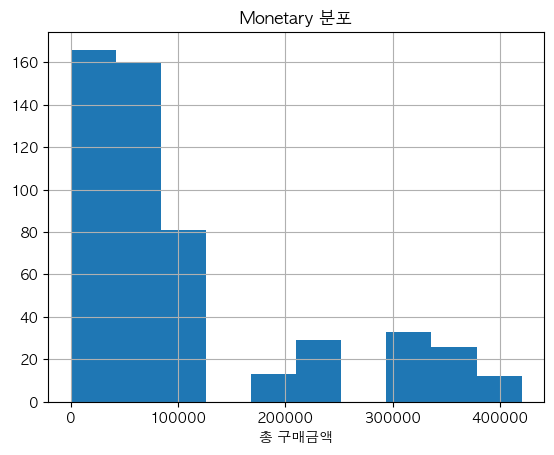

In [18]:
total_payment_by_user.hist()
plt.xlabel('총 구매금액')
plt.title('Monetary 분포')

In [19]:
RFM = pd.concat([most_recent_dates, sales_count_by_user, total_payment_by_user], axis = 1)
RFM.columns = ['Recency', 'Frequency', 'Monetary']

RFM['Recency'].fillna(pd.NaT, inplace=True)
RFM['Frequency'].fillna(0, inplace=True)
RFM['Monetary'].fillna(0, inplace=True)

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3009/861694588.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  RFM['Recency'].fillna(pd.NaT, inplace=True)
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3009/861694588.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [20]:
# Convert the Series to DataFrames
most_recent_dates_df = most_recent_dates.reset_index(name='Recency')
sales_count_by_user_df = sales_count_by_user.reset_index(name='Frequency')
total_payment_by_user_df = total_payment_by_user.reset_index(name='Monetary')

# Merge the DataFrames on 'userid'
RFM = pd.merge(most_recent_dates_df, sales_count_by_user_df, on='userid', how='outer')
RFM = pd.merge(RFM, total_payment_by_user_df, on='userid', how='outer')

# Fill NaN values with appropriate defaults
RFM['Recency'].fillna(pd.NaT, inplace=True)
RFM['Frequency'].fillna(0, inplace=True)
RFM['Monetary'].fillna(0, inplace=True)


/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3009/980924761.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  RFM['Recency'].fillna(pd.NaT, inplace=True)
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3009/980924761.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [21]:
# RFM

In [22]:
RFM.describe()

# 6개월간 총 결제 횟수의 평균값 : 1.5
# 총 결제 횟수의 중위값이 1 임. (전체의 절반이 총 한번밖에 유료결제를 하지 않았음)

,userid,Recency,Frequency,Monetary
count,520.000000,354,520.000000,520.000000
mean,260.500000,2023-05-16 20:20:20.338983168,1.696154,101769.230769
min,1.000000,2023-01-01 00:00:00,0.000000,0.000000
25%,130.750000,2023-05-01 00:00:00,0.000000,0.000000
50%,260.500000,2023-06-01 00:00:00,1.000000,60000.000000
75%,390.250000,2023-07-01 00:00:00,2.000000,120000.000000
max,520.000000,2023-07-01 00:00:00,7.000000,420000.000000
std,150.255338,NaN,1.922382,115342.936003


In [23]:
RFM['Recency'].value_counts()

Recency
2023-06-01    116
2023-07-01     96
2023-05-01     74
2023-03-01     32
2023-04-01     27
2023-01-01      9
Name: count, dtype: int64

In [24]:
RFM['Frequency'].value_counts()

Frequency
0.0    166
1.0    160
2.0     81
5.0     33
4.0     29
6.0     26
3.0     13
7.0     12
Name: count, dtype: int64

In [25]:
RFM['Monetary'].value_counts()

Monetary
0         166
60000     160
120000     81
300000     33
240000     29
360000     26
180000     13
420000     12
Name: count, dtype: int64

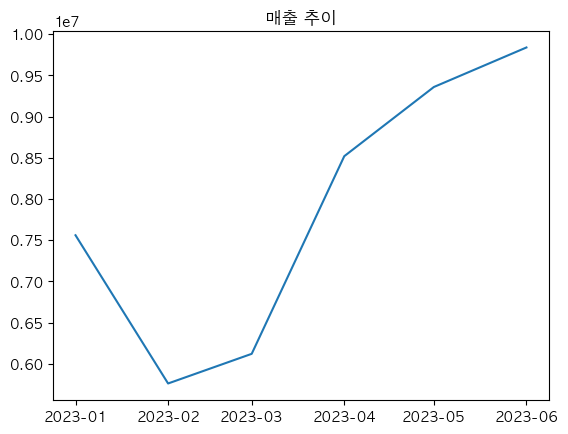

In [26]:
amount_by_date = spotify.groupby('timestamp_x')[['revenue']].sum().reset_index()

plt.plot(amount_by_date['timestamp_x'], amount_by_date['revenue'])
plt.title('매출 추이')
plt.show()



In [27]:
amount_by_date.value_counts()

timestamp_x  revenue
2023-01-01   7560000    1
2023-02-01   5760000    1
2023-03-01   6120000    1
2023-04-01   8520000    1
2023-05-01   9360000    1
2023-06-01   9840000    1
Name: count, dtype: int64

In [28]:
spotify['spotify_subscription_plan_y'].value_counts()

spotify_subscription_plan_y
Free (ad-supported)            2544
Premium (paid subscription)     576
Name: count, dtype: int64

In [29]:
RFM['Recency'] = pd.to_datetime(RFM['Recency']) 
today_date = pd.to_datetime(max(spotify['timestamp_y']))

rfm = RFM.groupby('userid').agg({'Recency': lambda x: (today_date - x.max()).days}).reset_index()
RFM = pd.merge(RFM, rfm, on='userid', how='left')
RFM

,userid,Recency_x,Frequency,Monetary,Recency_y
0,1,2023-01-01,1.0,60000,181.0
1,2,2023-05-01,2.0,120000,61.0
2,3,2023-06-01,4.0,240000,30.0
3,4,2023-06-01,4.0,240000,30.0
4,5,2023-06-01,4.0,240000,30.0
...,...,...,...,...,...
515,516,2023-05-01,1.0,60000,61.0
516,517,NaT,0.0,0,NaN
517,518,NaT,0.0,0,NaN
518,519,2023-07-01,7.0,420000,0.0


In [30]:
RFM['Recency_y'].fillna(300, inplace=True)
RFM['Recency_y'].value_counts()

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3009/3272069438.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  RFM['Recency_y'].fillna(300, inplace=True)


Recency_y
300.0    166
30.0     116
0.0       96
61.0      74
122.0     32
91.0      27
181.0      9
Name: count, dtype: int64

In [31]:
Recency_dict = {30.0: 1,
                61.0: 2,
                91.0: 3,
                122.0: 4,
                150.0: 5,
                181.0: 6,  ## 1월 결제 마지막
                300.0: 7} ## 무료

RFM['Recency_score'] = RFM['Recency_y'].map(Recency_dict)
RFM

,userid,Recency_x,Frequency,Monetary,Recency_y,Recency_score
0,1,2023-01-01,1.0,60000,181.0,6.0
1,2,2023-05-01,2.0,120000,61.0,2.0
2,3,2023-06-01,4.0,240000,30.0,1.0
3,4,2023-06-01,4.0,240000,30.0,1.0
4,5,2023-06-01,4.0,240000,30.0,1.0
...,...,...,...,...,...,...
515,516,2023-05-01,1.0,60000,61.0,2.0
516,517,NaT,0.0,0,300.0,7.0
517,518,NaT,0.0,0,300.0,7.0
518,519,2023-07-01,7.0,420000,0.0,NaN


In [32]:

# a1, a2, a3, a4 = np.percentile(RFM['Recency_y'], [20,40,60,80])
# a1, a2, a3, a4

In [33]:
# def percent(x):
#     if x <= a1:
#         return 1  # 충성, 신규
#     elif x > a1 and x <= a2:
#         return 2
#     elif x > a2 and x <= a3:
#         return 3
#     elif x > a3 and x < a4:
#         return 4
#     elif x >= a4:
#         return 5  # 무료 회원

In [34]:
# RFM['Recency_score'] = RFM['Recency_y'].apply(percent)
# RFM

In [35]:
RFM['Frequency'].value_counts()

Frequency
0.0    166
1.0    160
2.0     81
5.0     33
4.0     29
6.0     26
3.0     13
7.0     12
Name: count, dtype: int64

In [36]:
Frequency_dict = {0.0: 7,
                  1.0: 6,
                  2.0: 5,
                  3.0: 4,
                  4.0: 3,
                  5.0: 2,  ## 1월 결제 마지막
                  6.0: 1} ## 무료

RFM['Frequency_score'] = RFM['Frequency'].map(Frequency_dict)
RFM

,userid,Recency_x,Frequency,Monetary,Recency_y,Recency_score,Frequency_score
0,1,2023-01-01,1.0,60000,181.0,6.0,6.0
1,2,2023-05-01,2.0,120000,61.0,2.0,5.0
2,3,2023-06-01,4.0,240000,30.0,1.0,3.0
3,4,2023-06-01,4.0,240000,30.0,1.0,3.0
4,5,2023-06-01,4.0,240000,30.0,1.0,3.0
...,...,...,...,...,...,...,...
515,516,2023-05-01,1.0,60000,61.0,2.0,6.0
516,517,NaT,0.0,0,300.0,7.0,7.0
517,518,NaT,0.0,0,300.0,7.0,7.0
518,519,2023-07-01,7.0,420000,0.0,NaN,NaN


In [37]:
# b1, b2, b3, b4 = np.percentile(RFM['Frequency'], [20,40,80,95])
# b1, b2, b3, b4a

In [38]:
# def percent(x):
#     if x == b1:
#         return 5  # 무료
#     elif x > b1 and x <= b2:
#         return 4  # 이탈
#     elif x > b2 and x <= b3:
#         return 3
#     elif x > b3 and x < b4:
#         return 2
#     elif x >= b4:
#         return 1  # 충성회원

In [39]:
# RFM['Frequency_score'] = RFM['Frequency'].apply(percent)
# RFM

In [40]:
RFM['Monetary'].value_counts()

Monetary
0         166
60000     160
120000     81
300000     33
240000     29
360000     26
180000     13
420000     12
Name: count, dtype: int64

In [41]:
Monetary_dict = {0: 7, ## 무료
                60000: 6,  ## 휴면
                120000: 5,  ## 휴면
                180000: 4,
                240000: 3,
                300000: 2,  
                360000: 1} ## 충성고객

RFM['Monetary_score'] = RFM['Monetary'].map(Monetary_dict)
RFM

,userid,Recency_x,Frequency,Monetary,Recency_y,Recency_score,Frequency_score,Monetary_score
0,1,2023-01-01,1.0,60000,181.0,6.0,6.0,6.0
1,2,2023-05-01,2.0,120000,61.0,2.0,5.0,5.0
2,3,2023-06-01,4.0,240000,30.0,1.0,3.0,3.0
3,4,2023-06-01,4.0,240000,30.0,1.0,3.0,3.0
4,5,2023-06-01,4.0,240000,30.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...
515,516,2023-05-01,1.0,60000,61.0,2.0,6.0,6.0
516,517,NaT,0.0,0,300.0,7.0,7.0,7.0
517,518,NaT,0.0,0,300.0,7.0,7.0,7.0
518,519,2023-07-01,7.0,420000,0.0,NaN,NaN,NaN


In [42]:
# c1, c2, c3, c4 = np.percentile(RFM['Monetary'], [20,40,80,95])
# c1, c2, c3, c4

In [43]:
# def percent(x):
#     if x == c1:
#         return 5  # 무료
#     elif x > c1 and x <= c2:
#         return 4  # 이탈
#     elif x > c2 and x <= c3:
#         return 3
#     elif x > c3 and x < c4:
#         return 2
#     elif x >= c4:
#         return 1  # 충성회원

In [44]:
# RFM['Monetary_score'] = RFM['Monetary'].apply(percent)
# RFM

In [45]:
RFM = pd.read_csv('/Users/hj/Documents/무제/실전프로젝트/Spotify_RFM.csv')
RFM =RFM.drop(columns='Unnamed: 0')
RFM

,userid,Recency,Frequency,Monetary,Monetary_score,Recency_score
0,1,2023-01-01,1.0,60000,1,1
1,2,2023-05-01,2.0,120000,2,4
2,3,2023-06-01,4.0,240000,4,5
3,4,2023-06-01,4.0,240000,4,5
4,5,2023-06-01,4.0,240000,4,5
...,...,...,...,...,...,...
515,516,2023-05-01,1.0,60000,1,4
516,517,NaN,0.0,0,0,0
517,518,NaN,0.0,0,0,0
518,519,2023-07-01,7.0,420000,7,6


- RFM 스코어 합치기

In [46]:
RFM['Frequency'] = RFM['Frequency'].astype(int)
RFM['RFM_score'] = RFM['Recency_score'].astype(str) + RFM['Frequency'].astype(str) + RFM['Monetary_score'].astype(str)
RFM

,userid,Recency,Frequency,Monetary,Monetary_score,Recency_score,RFM_score
0,1,2023-01-01,1,60000,1,1,111
1,2,2023-05-01,2,120000,2,4,422
2,3,2023-06-01,4,240000,4,5,544
3,4,2023-06-01,4,240000,4,5,544
4,5,2023-06-01,4,240000,4,5,544
...,...,...,...,...,...,...,...
515,516,2023-05-01,1,60000,1,4,411
516,517,NaN,0,0,0,0,000
517,518,NaN,0,0,0,0,000
518,519,2023-07-01,7,420000,7,6,677


In [47]:
RFM['Recency_score'].value_counts()

Recency_score
0    166
5    116
6     96
4     74
2     32
3     27
1      9
Name: count, dtype: int64

In [48]:
RFM['RFM_score'].value_counts().sort_index()

RFM_score
000    166
111      9
211     29
222      3
311     22
322      5
411     39
422     31
433      4
511     61
522     42
533      6
544      7
633      3
644     22
655     33
666     26
677     12
Name: count, dtype: int64

In [49]:
RFM[RFM['RFM_score']=='633'].head()

,userid,Recency,Frequency,Monetary,Monetary_score,Recency_score,RFM_score
99,100,2023-07-01,3,180000,3,6,633
186,187,2023-07-01,3,180000,3,6,633
506,507,2023-07-01,3,180000,3,6,633


In [50]:
spotify[spotify['userid']==24]

,userid,spotify_subscription_plan_x,revenue,timestamp_x,timestamp_y,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan_y,...,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
138,24,Free (ad-supported),0,2023-01-01,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),...,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time","recommendations, Playlists, Radio",1,Rarely,Comedy,Interview,Both,Shorter,Very Satisfied
139,24,Premium (paid subscription),60000,2023-02-01,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),...,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time","recommendations, Playlists, Radio",1,Rarely,Comedy,Interview,Both,Shorter,Very Satisfied
140,24,Free (ad-supported),0,2023-03-01,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),...,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time","recommendations, Playlists, Radio",1,Rarely,Comedy,Interview,Both,Shorter,Very Satisfied
141,24,Premium (paid subscription),60000,2023-04-01,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),...,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time","recommendations, Playlists, Radio",1,Rarely,Comedy,Interview,Both,Shorter,Very Satisfied
142,24,Premium (paid subscription),60000,2023-05-01,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),...,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time","recommendations, Playlists, Radio",1,Rarely,Comedy,Interview,Both,Shorter,Very Satisfied
143,24,Premium (paid subscription),60000,2023-06-01,2023-07-01,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),...,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time","recommendations, Playlists, Radio",1,Rarely,Comedy,Interview,Both,Shorter,Very Satisfied


RFM Segment

> 충성고객 :
- 655(o), 666(o) 677(o)
> 이탈우려고객 : 많은 금액 소비하고, 자주 구매했었으나, 최근 구매하지 않은 고객
- 544(7월 x), 
> 잠재충성고객 : 3번이상 구매한 고객
- 433(7월 x),533(7월x),644(7월 o) ,633(7월 o)
> 관심필요고객 : 최근성, 구매빈도, 구매금액 평균 이상인 고객 (2회)
- 422, 522
> 신규고객 : 최근에 구매했으나 자주 방문하지 않은 고객 (2달 이내)
- 511(7월x), 
> 휴면고객 : 적은 금액 소비하고, 오래전에 방문한 고객(유료(1월)->무료전환), 한번 결제후 무료 전환
- 111, 211, 222, 311, 322, 411
> 무료회원 : 구매이력 X
- 000

In [51]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   userid                       3120 non-null   int64         
 1   spotify_subscription_plan_x  3120 non-null   object        
 2   revenue                      3120 non-null   int64         
 3   timestamp_x                  3120 non-null   datetime64[ns]
 4   timestamp_y                  3120 non-null   object        
 5   Age                          3120 non-null   object        
 6   Gender                       3120 non-null   object        
 7   spotify_usage_period         3120 non-null   object        
 8   spotify_listening_device     3120 non-null   object        
 9   spotify_subscription_plan_y  3120 non-null   object        
 10  premium_sub_willingness      3120 non-null   object        
 11  preffered_premium_plan       1872 non-null 

In [52]:
RFM

,userid,Recency,Frequency,Monetary,Monetary_score,Recency_score,RFM_score
0,1,2023-01-01,1,60000,1,1,111
1,2,2023-05-01,2,120000,2,4,422
2,3,2023-06-01,4,240000,4,5,544
3,4,2023-06-01,4,240000,4,5,544
4,5,2023-06-01,4,240000,4,5,544
...,...,...,...,...,...,...,...
515,516,2023-05-01,1,60000,1,4,411
516,517,NaN,0,0,0,0,000
517,518,NaN,0,0,0,0,000
518,519,2023-07-01,7,420000,7,6,677


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


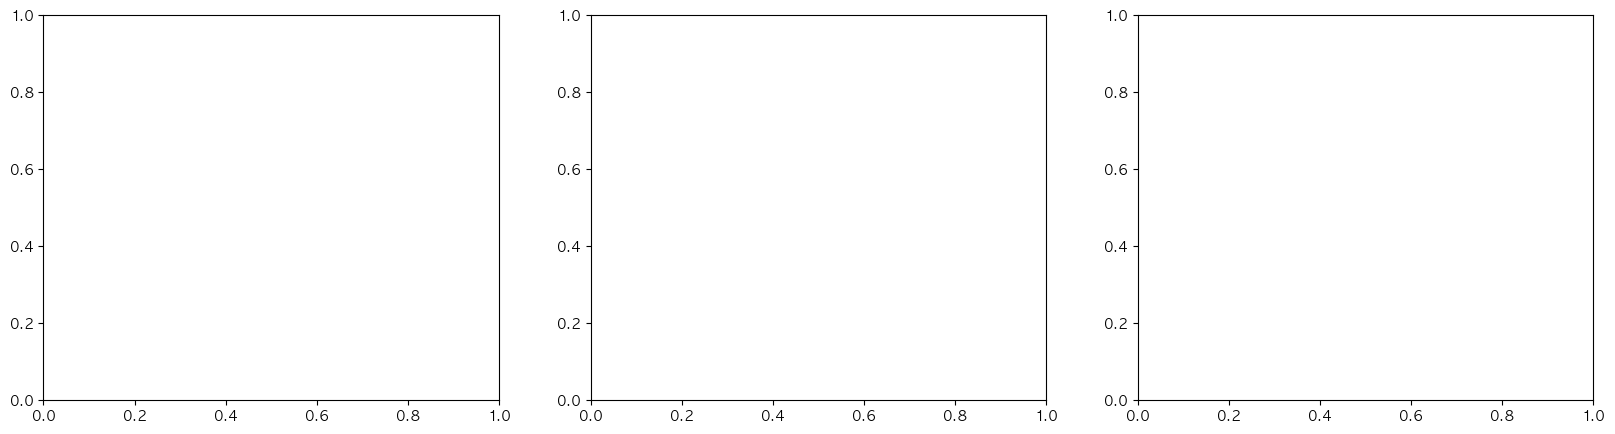

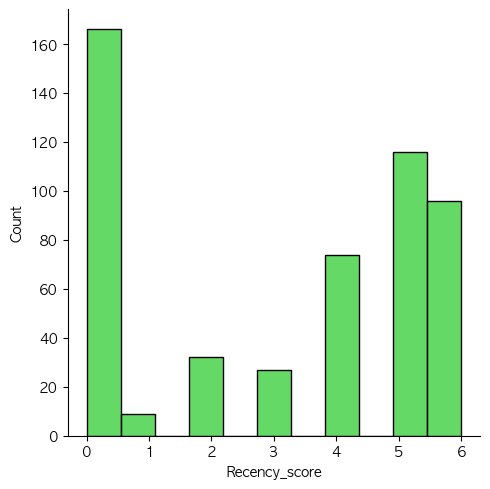

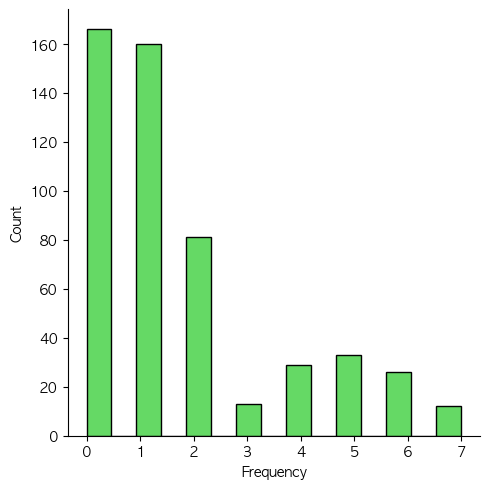

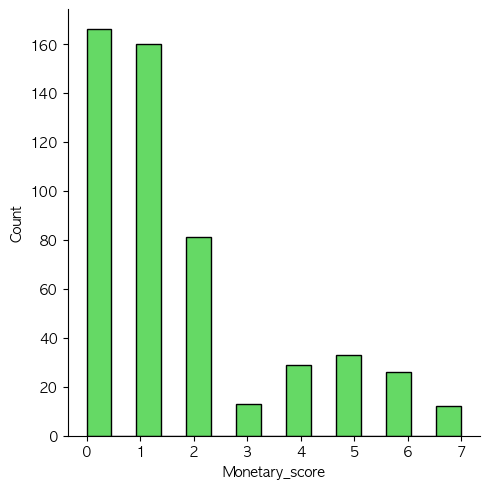

In [53]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
columns_to_plot = [5,2,4]
color_hex = "#32CD32"
for i, column_idx in enumerate(columns_to_plot):
    sns.displot(RFM.iloc[:, column_idx], ax=axes[i], color=color_hex)

plt.show()

In [54]:
RFM['Grade'] = RFM['RFM_score'].apply(lambda x: '충성고객' if x in ['655','666','677'] else ('이탈우려고객' if x == '544' else ('잠재충성고객' if x in ['644', '533','433', '633'] else ('신규고객' if x in ['411', '511'] else ('휴면고객' if x in ['111', '211', '222', '311', '322', '411'] else ('무료회원' if x == '000' else '관심필요고객'))))))
RFM

,userid,Recency,Frequency,Monetary,Monetary_score,Recency_score,RFM_score,Grade
0,1,2023-01-01,1,60000,1,1,111,휴면고객
1,2,2023-05-01,2,120000,2,4,422,관심필요고객
2,3,2023-06-01,4,240000,4,5,544,이탈우려고객
3,4,2023-06-01,4,240000,4,5,544,이탈우려고객
4,5,2023-06-01,4,240000,4,5,544,이탈우려고객
...,...,...,...,...,...,...,...,...
515,516,2023-05-01,1,60000,1,4,411,신규고객
516,517,NaN,0,0,0,0,000,무료회원
517,518,NaN,0,0,0,0,000,무료회원
518,519,2023-07-01,7,420000,7,6,677,충성고객


In [55]:
RFM['Grade'].value_counts()

Grade
무료회원      166
신규고객      100
관심필요고객     73
충성고객       71
휴면고객       68
잠재충성고객     35
이탈우려고객      7
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Grade'>

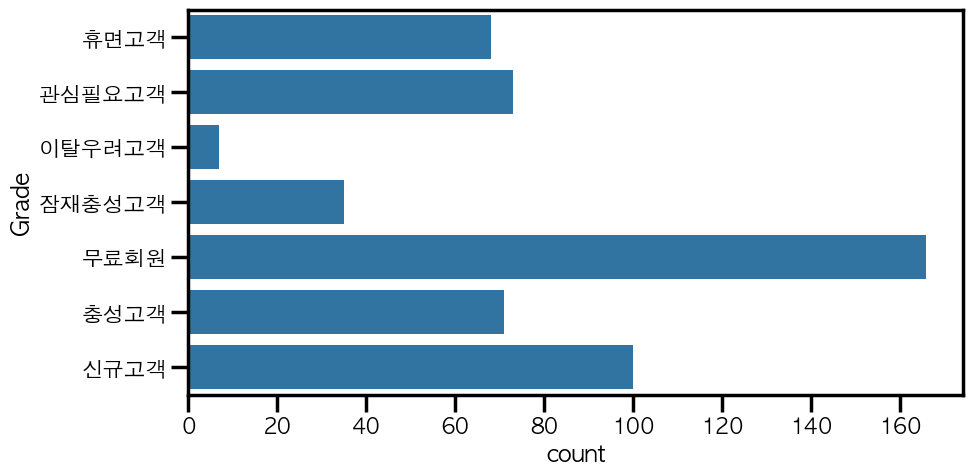

In [56]:
plt.figure(figsize=(10,5))
sns.set_context("poster", font_scale=0.7)
sns.countplot(RFM['Grade'])

In [57]:
RFM.to_csv('./rfm_score.csv', index=False)

In [58]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          520 non-null    int64 
 1   Recency         354 non-null    object
 2   Frequency       520 non-null    int64 
 3   Monetary        520 non-null    int64 
 4   Monetary_score  520 non-null    int64 
 5   Recency_score   520 non-null    int64 
 6   RFM_score       520 non-null    object
 7   Grade           520 non-null    object
dtypes: int64(5), object(3)
memory usage: 32.6+ KB


In [59]:
from sklearn.preprocessing import MinMaxScaler  
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer


In [60]:
scaleing = RFM.iloc[:,2:5]
scaleing

,Frequency,Monetary,Monetary_score
0,1,60000,1
1,2,120000,2
2,4,240000,4
3,4,240000,4
4,4,240000,4
...,...,...,...
515,1,60000,1
516,0,0,0
517,0,0,0
518,7,420000,7


## Raw RFM 점수 + KMeans 

In [61]:
# scaler = MinMaxScaler()
# scaled_df = pd.DataFrame(data=scaler.fit_transform(scaleing), columns=scaleing.columns)

In [62]:
# SSE = []
# for k in range(0,10):
#     kmeans = KMeans(n_clusters=k+1, random_state=42).fit(scaled_df)
#     SSE.append(kmeans.inertia_)

# sns.pointplot(x=list(range(1,11)), y=SSE)
# plt.show()

In [63]:
# optimal_clusters = 3  # Replace with your optimal number of clusters
# visualizer = SilhouetteVisualizer(KMeans(optimal_clusters, random_state=42), colors='yellowbrick')
# visualizer.fit(scaleing)
# visualizer.show()

In [64]:
RFM_kmeans = RFM[['Recency_score', 'Frequency', 'Monetary_score']]

## RFM score + KMeans

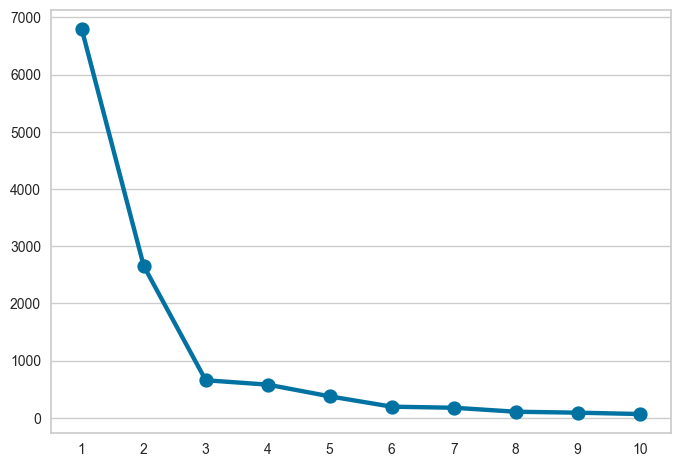

In [65]:

SSE = []
for k in range(0,10):
    kmeans = KMeans(n_clusters=k+1, random_state=42).fit(RFM_kmeans)
    SSE.append(kmeans.inertia_)
    
sns.pointplot(x=list(range(1,11)), y=SSE)
plt.show()

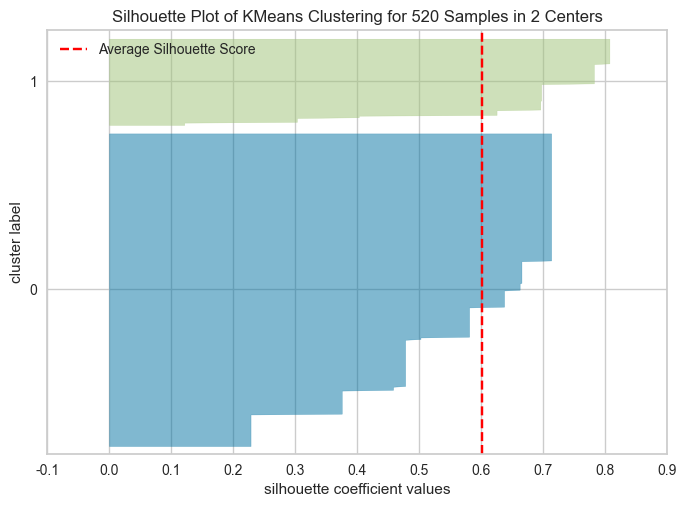

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 520 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [66]:
optimal_clusters = 2  # Replace with your optimal number of clusters
visualizer = SilhouetteVisualizer(KMeans(optimal_clusters, random_state=42), colors='yellowbrick')
visualizer.fit(RFM_kmeans)
visualizer.show()

In [67]:
model = KMeans(n_clusters=4, random_state=42).fit(RFM_kmeans)
centers = model.cluster_centers_
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(RFM.iloc[:,5], RFM.iloc[:,6], RFM.iloc[:, 7], cmap='brg',
           c=model.predict(RFM_kmeans))
ax.scatter(centers[:,0], centers[:,1], c='black')

ValueError: could not convert string to float: '휴면고객'

Error in callback <function _draw_all_if_interactive at 0x12b31f240> (for post_execute), with arguments args (),kwargs {}:


TypeError: can't multiply sequence by non-int of type 'float'

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 800x550 with 1 Axes>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

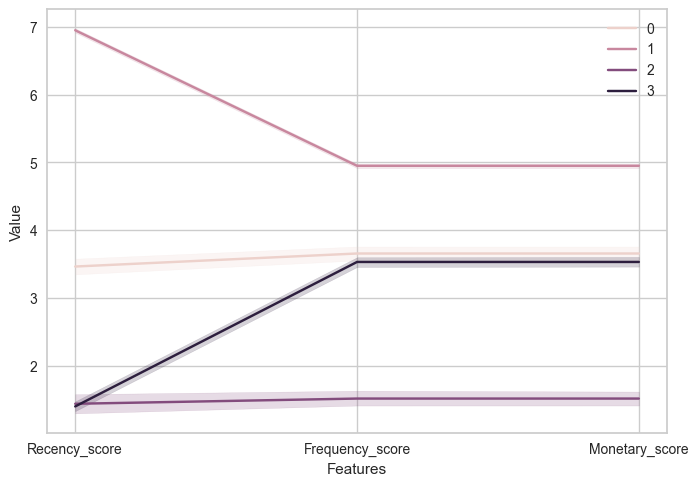

In [ ]:
RFM['Cluster'] = model.labels_

melted_rfm = pd.melt(RFM.reset_index(),
                     id_vars=['userid', 'Cluster'],
                     value_vars=['Recency_score', 'Frequency_score', 'Monetary_score'],
                     var_name='Features',
                     value_name='Value')
sns.lineplot(x='Features', y='Value', hue='Cluster', data=melted_rfm)
plt.legend()
plt.show()

In [ ]:
RFM.groupby('Cluster').agg({
    'Recency_y':['mean', 'min', 'max'],
    'Frequency':['mean','min','max'],
    'Monetary':['mean','min','max','count']
})

Recency_y               Frequency                 Monetary          \
               mean    min    max      mean  min  max           mean     min   
Cluster                                                                        
0        105.269231   91.0  150.0  1.551282  1.0  3.0   93076.923077   60000   
1        293.880000  181.0  300.0  0.051429  0.0  1.0    3085.714286       0   
2         43.435897   30.0   91.0  4.641026  4.0  6.0  278461.538462  240000   
3         42.301587   30.0   61.0  1.555556  1.0  3.0   93333.333333   60000   

                       
            max count  
Cluster                
0        180000    78  
1         60000   175  
2        360000    78  
3        180000   189

In [ ]:
RFM

,userid,Recency_x,Frequency,Monetary,Recency_y,Recency_score,Frequency_score,Monetary_score,RFM_score,Grade,Cluster
0,1,2023-01-01,1.0,60000,181.0,6,4,4,644,기타,1
1,2,2023-05-01,2.0,120000,61.0,2,3,3,233,신규고객,3
2,3,2023-06-01,4.0,240000,30.0,1,2,2,122,이탈우려고객,2
3,4,2023-06-01,4.0,240000,30.0,1,2,2,122,이탈우려고객,2
4,5,2023-06-01,4.0,240000,30.0,1,2,2,122,이탈우려고객,2
...,...,...,...,...,...,...,...,...,...,...,...
515,516,2023-05-01,1.0,60000,61.0,2,4,4,244,신규고객,3
516,517,NaT,0.0,0,300.0,7,5,5,755,기타,1
517,518,NaT,0.0,0,300.0,7,5,5,755,기타,1
518,519,2023-06-01,6.0,360000,30.0,1,1,1,111,충성고객,2


In [ ]:
RFM.iloc[:,[9,10]].value_counts()

Grade   Cluster
신규고객    3          189
기타      1          175
휴면고객    0           77
충성고객    2           38
잠재충성고객  2           21
이탈우려고객  2           19
기타      0            1
Name: count, dtype: int64